In [1]:
#step 1: Load data
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, log_loss, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

data_path = "C:/Users/missk/Downloads/archive (5)/spotify_songs.csv"
df = pd.read_csv(data_path)
print("Initial shape:", df.shape)
df

Initial shape: (32833, 23)


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


***step 2: Data preprocessing***
1. handle missing values
2. encode categorical
3. feature engineering (duration_min, release_year)
4. remove text columns
5. outliers removal (tempo, loudness)
6. visualize / describe / PCA check

In [3]:
#2.1.missing values check
missing = df.isnull().sum().sort_values(ascending=False)
print("Missing values per column:\n", missing)

#show rows with missing
rows_with_missing = df[df.isnull().any(axis=1)]
print("Rows with any missing:", len(rows_with_missing))

Missing values per column:
 track_artist                5
track_album_name            5
track_name                  5
track_id                    0
key                         0
tempo                       0
valence                     0
liveness                    0
instrumentalness            0
acousticness                0
speechiness                 0
mode                        0
loudness                    0
danceability                0
energy                      0
playlist_subgenre           0
playlist_genre              0
playlist_id                 0
playlist_name               0
track_album_release_date    0
track_album_id              0
track_popularity            0
duration_ms                 0
dtype: int64
Rows with any missing: 5


In [5]:
#2.2.drop useless text columns (IDs/names)
cols_drop = ['track_id', 'track_name', 'playlist_subgenre', 'track_album_id', 'track_album_name', 'playlist_name', 'playlist_id']
df = df.drop(columns=[c for c in cols_drop if c in df.columns])
print("Dropped text columns. Shape:", df.shape)

Dropped text columns. Shape: (32833, 16)


In [7]:
#2.3.drop rows where track_name and track_artist missing (rare)
df = df.dropna(subset=['track_artist'])
print("After dropping rows without track_name/track_artist:", df.shape)

After dropping rows without track_name/track_artist: (32828, 16)


Label mapping:
0 → edm
1 → latin
2 → pop
3 → r&b
4 → rap
5 → rock


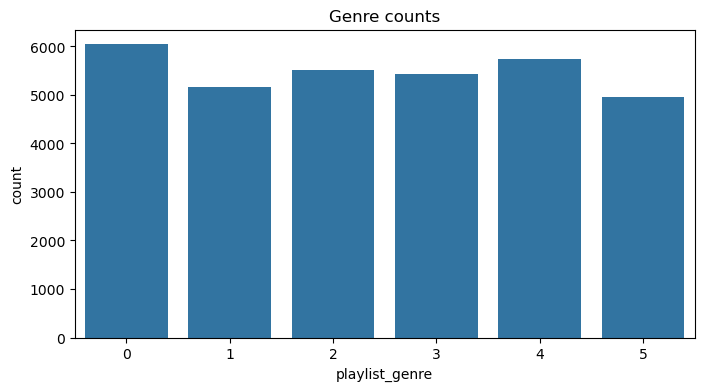

Genre counts:
 playlist_genre
0    6043
4    5746
2    5507
3    5431
1    5155
5    4951
Name: count, dtype: int64


In [8]:
#2.4.encode categorical variables (LabelEncoder)
df = pd.read_csv("C:/Users/missk/Downloads/archive (5)/spotify_songs.csv")

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['playlist_genre'] = le.fit_transform(df['playlist_genre'])

print("Label mapping:")
for i, g in enumerate(le.classes_):
    print(i, "→", g)
    
plt.figure(figsize=(8,4))
sns.countplot(x='playlist_genre', data=df)
plt.title("Genre counts")
plt.show()

#show class distribution numbers
print("Genre counts:\n", df['playlist_genre'].value_counts())

In [9]:
bad_mask = pd.to_datetime(df['track_album_release_date'], errors='coerce').isna()
print("Проблемных дат:", bad_mask.sum())
display(df.loc[bad_mask, 'track_album_release_date'].head(20))
print(df['track_album_release_date'].astype(str).str.len().value_counts().head())


Проблемных дат: 1886


151    2012
749    1998
750    1996
751    1999
753    1993
755    1996
759    1991
765    1998
768    2000
779    1994
782    1994
785    2007
786    2000
787    2007
788    1999
789    1998
793    1994
798    1994
804    1994
805    1996
Name: track_album_release_date, dtype: object

track_album_release_date
10    30947
4      1855
7        31
Name: count, dtype: int64


In [10]:
# 2.5 Feature engineering
if 'duration_ms' in df.columns:
    df['duration_min'] = df['duration_ms'] / 60000.0
    df.drop(columns=['duration_ms'], inplace=True)

if 'track_album_release_date' in df.columns:
    df['release_year'] = (
        df['track_album_release_date']
        .astype(str)
        .str.extract(r'^(\d{4})')[0]
        .astype(float)
    )
    df.drop(columns=['track_album_release_date'], inplace=True)


# 2.6 Remove highly correlated features
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
corr = df[num_cols].corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
to_drop = [c for c in upper.columns if any(upper[c] > 0.9)]
if to_drop:
    df.drop(columns=to_drop, inplace=True)
    print("Dropped correlated features:", to_drop)
else:
    print("No features with correlation > 0.9 found.")

No features with correlation > 0.9 found.



Dataset description (numeric):


,track_popularity,playlist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min,release_year
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,2.442695,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,3.763330,2011.137270
std,24.984074,1.708774,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,0.997233,11.417451
min,0.000000,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,1957.000000
25%,24.000000,1.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,3.130317,2008.000000
50%,45.000000,2.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,3.600000,2016.000000
75%,62.000000,4.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,4.226417,2019.000000
max,100.000000,5.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,8.630167,2020.000000


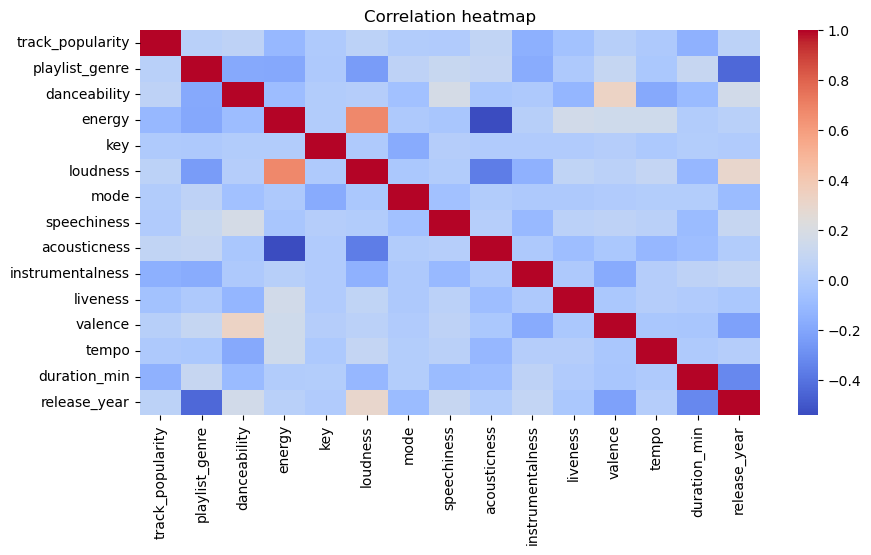

In [11]:
#2.7.basic visualizations and description
print("\nDataset description (numeric):")
display(df.describe())

plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title("Correlation heatmap")
plt.show()

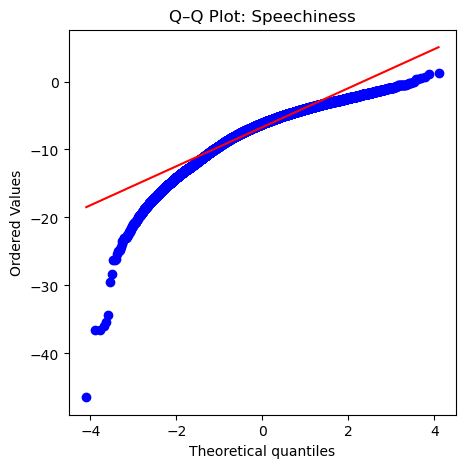

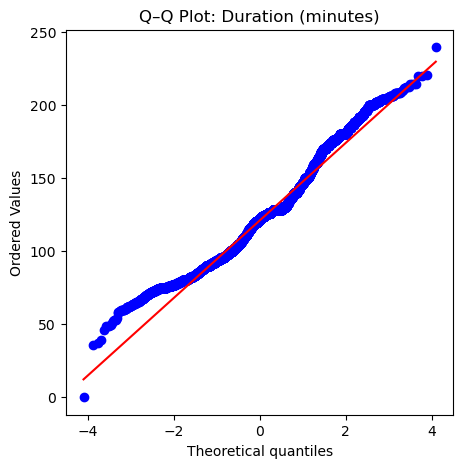

In [13]:
#2.8.outliers visualization and removal 
import scipy.stats as stats
import matplotlib.pyplot as plt

# Q-Q plot for 'loudness'
plt.figure(figsize=(5,5))
stats.probplot(df['loudness'], dist="norm", plot=plt)
plt.title("Q–Q Plot: Speechiness")
plt.show()


# Q-Q plot for 'tempo'
plt.figure(figsize=(5,5))
stats.probplot(df['tempo'], dist="norm", plot=plt)
plt.title("Q–Q Plot: Duration (minutes)")
plt.show()

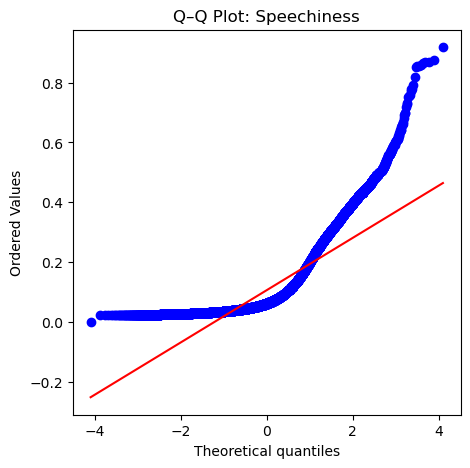

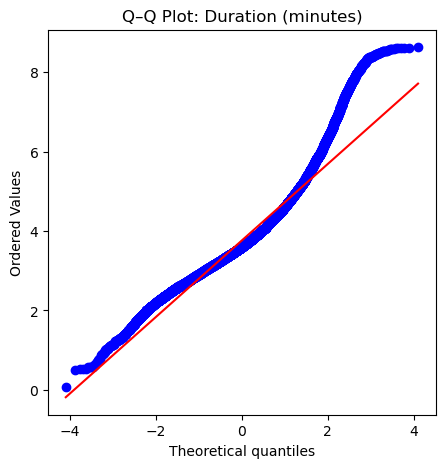

In [14]:
# Q-Q plot for 'speechiness'
plt.figure(figsize=(5,5))
stats.probplot(df['speechiness'], dist="norm", plot=plt)
plt.title("Q–Q Plot: Speechiness")
plt.show()

# Q-Q plot for 'duration_min'
plt.figure(figsize=(5,5))
stats.probplot(df['duration_min'], dist="norm", plot=plt)
plt.title("Q–Q Plot: Duration (minutes)")
plt.show()

In [15]:
#define reasonable limits and remove rows outside them
bounds = {
    'tempo':        (40, 220),          # музыкально-реалистичные BPM
    'loudness':     (-35, 0),           # дБFS (ниже -35 обычно мусор/тишина)
    'speechiness':  (0.0, 0.95),        # ограничим только экстремумы
    'duration_min': (0.5, 10.0)         # короткие <30с и сверхдлинные >10м — за пределы
}

before = len(df)
mask = np.ones(before, dtype=bool)
for c, (lo, hi) in bounds.items():
    mask &= df[c].between(lo, hi)

df = df[mask].copy()
after = len(df)
print(f"Domain filters: removed {before - after}, kept {after}")


Domain filters: removed 18, kept 32815


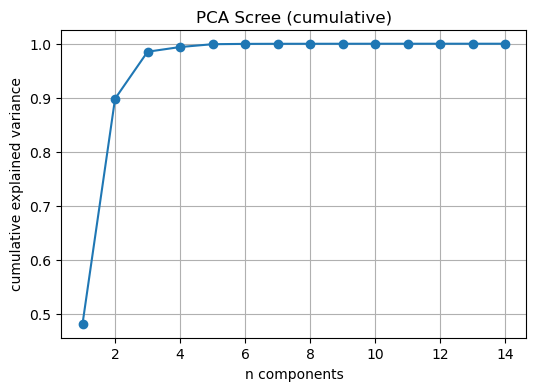

Components needed for 90% variance: 3


In [16]:
#2.9.optional PCA check (how many components explain variance)
from sklearn.decomposition import PCA
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
#remove target from numeric candidate list
if 'playlist_genre' in numeric_cols:
    numeric_cols.remove('playlist_genre')

X_numeric = df[numeric_cols].fillna(df[numeric_cols].median())  #simple fill to do PCA
pca = PCA()
pca.fit(X_numeric)
explained = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(6,4))
plt.plot(np.arange(1, len(explained)+1), explained, marker='o')
plt.xlabel('n components')
plt.ylabel('cumulative explained variance')
plt.title('PCA Scree (cumulative)')
plt.grid(True)
plt.show()
print("Components needed for 90% variance:", np.argmax(explained >= 0.90) + 1)

PCA analysis shows that the first 3 principal components explain about 90% of the total variance.
This means that most of the information in the numeric features can be captured using only 3 dimensions, reducing redundancy and improving computational efficiency.

In [25]:
#step 3: prepare X and y, split to train/test
cols_drop = ['track_id', 'track_artist', 'track_name', 'playlist_subgenre', 'track_album_id', 'track_album_name', 'playlist_name', 'playlist_id']
df = df.drop(columns=[c for c in cols_drop if c in df.columns])

y = df['playlist_genre']
X = df.drop(columns=['playlist_genre'])

#split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Shapes: X_train, X_test, y_train, y_test ->", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Shapes: X_train, X_test, y_train, y_test -> (26252, 14) (6563, 14) (26252,) (6563,)


In [26]:
#step 4: scale features SAFELY (fit scaler only on train)
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns, index=X_test.index)


In [28]:
# ================== FIXED FE + PREPROCESSOR + TASK 4 (ready to run) ==================

# --- imports (минимально нужные — безопасно дублировать) ---
import numpy as np
import pandas as pd
from pathlib import Path
from typing import Dict, Any, List, Tuple

from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, f1_score, log_loss, roc_auc_score, classification_report

# models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

# ----------------- безопасные дефолты, если ещё не объявлены -----------------
try:
    RANDOM_STATE
except NameError:
    RANDOM_STATE = 42

try:
    FAST_MODE
except NameError:
    FAST_MODE = True  # быстрее поиск

try:
    CALIBRATE_LINEARSVC
except NameError:
    CALIBRATE_LINEARSVC = True

try:
    OUT_DIR
except NameError:
    OUT_DIR = Path("./outputs_spotify_genre")
    OUT_DIR.mkdir(parents=True, exist_ok=True)

# ----------------- гарантируем, что есть X_train/X_test -----------------
try:
    X_train, X_test, y_train, y_test
except NameError:
    # если не создано — собираем из df
    TARGET = "playlist_genre"
    X = df.drop(columns=[TARGET], errors="ignore").copy()
    y = df[TARGET].astype("category").copy()
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.20, stratify=y, random_state=RANDOM_STATE
    )

# ----------------- Feature Engineering (с фиксом на имена колонок) -----------------
def add_features(df_):
    df_ = df_.copy()
    if "duration_ms" in df_.columns:
        df_["duration_min"] = df_["duration_ms"] / 60000.0
    if {"energy","danceability"}.issubset(df_.columns):
        df_["energy_x_dance"] = df_["energy"] * df_["danceability"]
    if "tempo" in df_.columns:
        df_["log_tempo"] = np.log1p(df_["tempo"].clip(lower=0))
    return df_

fe = FunctionTransformer(add_features, validate=False)
# критично: чтобы downstream видел реальные новые названия колонок
fe.set_output(transform="pandas")

# ----------------- Preprocessor (impute + scale только для чисел) -----------------
numeric_preproc = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
# динамический выбор числовых после FE
preprocessor = ColumnTransformer(
    transformers=[("num", numeric_preproc, make_column_selector(dtype_include=np.number))],
    remainder="drop"
)

# ----------------- МОДЕЛИ (10 классических) + PCA-вариант + NN -----------------
def grid(fast: Dict, full: Dict) -> Dict:
    return fast if FAST_MODE else full

models: Dict[str, Tuple[Any, Dict[str, Any]]] = {
    "LogisticRegression": (
        LogisticRegression(max_iter=400, multi_class="ovr"),
        grid({"clf__C":[0.5,1,2]},
             {"clf__C": np.logspace(-2,2,10).tolist()})
    ),
    "KNN": (
        KNeighborsClassifier(),
        grid({"clf__n_neighbors":[5,11,17], "clf__weights":["uniform","distance"]},
             {"clf__n_neighbors":list(range(3,31,2)), "clf__weights":["uniform","distance"]})
    ),
    "SVC": (
        SVC(probability=True),
        grid({"clf__C":[1,10], "clf__gamma":["scale","auto"]},
             {"clf__C": np.logspace(-2,2,8).tolist(), "clf__gamma":["scale","auto"]})
    ),
    "LinearSVC": (
        LinearSVC(),
        grid({"clf__C":[0.01,0.1,1.0]},
             {"clf__C": np.logspace(-3,1,8).tolist()})
    ),
    "DecisionTree": (
        DecisionTreeClassifier(random_state=RANDOM_STATE),
        grid({"clf__max_depth":[None,10,20], "clf__min_samples_split":[2,5,10]},
             {"clf__max_depth":[None,5,10,15,20], "clf__min_samples_split":[2,5,10]})
    ),
    "RandomForest": (
        RandomForestClassifier(random_state=RANDOM_STATE),
        grid({"clf__n_estimators":[150,250], "clf__max_depth":[None,20], "clf__min_samples_split":[2,5]},
             {"clf__n_estimators":[200,300,400], "clf__max_depth":[None,10,20], "clf__min_samples_split":[2,5]})
    ),
    "GradientBoosting": (
        GradientBoostingClassifier(random_state=RANDOM_STATE),
        grid({"clf__n_estimators":[150], "clf__learning_rate":[0.05,0.1], "clf__max_depth":[2,3]},
             {"clf__n_estimators":[150,200], "clf__learning_rate":[0.05,0.1,0.2], "clf__max_depth":[2,3,4]})
    ),
    "AdaBoost": (
        AdaBoostClassifier(random_state=RANDOM_STATE),
        grid({"clf__n_estimators":[200], "clf__learning_rate":[0.5,1.0]},
             {"clf__n_estimators":[200,300,400], "clf__learning_rate":[0.05,0.1,0.5,1.0]})
    ),
    "ExtraTrees": (
        ExtraTreesClassifier(random_state=RANDOM_STATE),
        grid({"clf__n_estimators":[300], "clf__max_depth":[None,20], "clf__min_samples_split":[2,5]},
             {"clf__n_estimators":[400,600], "clf__max_depth":[None,10,20], "clf__min_samples_split":[2,5]})
    ),
    "GaussianNB": (
        GaussianNB(),
        grid({"clf__var_smoothing":[1e-9,1e-8]},
             {"clf__var_smoothing": np.logspace(-12,-6,7).tolist()})
    ),
}

# Явный PCA-вариант (LogReg на PCA-компонентах)
logreg_pca_pipe = Pipeline([
    ("fe", fe),
    ("preprocessor", preprocessor),
    ("pca", PCA(n_components=10, random_state=RANDOM_STATE)),
    ("clf", LogisticRegression(max_iter=400, multi_class="ovr"))
])
logreg_pca_grid = grid(
    {"clf__C":[0.5,1,2]},
    {"clf__C": np.logspace(-2,2,10).tolist()}
)

# Нейросеть (для Task 5)
nn_pipe = Pipeline([
    ("fe", fe),
    ("preprocessor", preprocessor),
    ("clf", MLPClassifier(max_iter=300, random_state=RANDOM_STATE, early_stopping=True))
])
nn_grid = grid(
    {
        "clf__hidden_layer_sizes":[(128,), (64,32), (128,64)],
        "clf__activation":["relu","tanh"],
        "clf__learning_rate_init":[1e-3,5e-4],
        "clf__batch_size":[128,256],
        "clf__alpha":[1e-5,1e-4]
    },
    {
        "clf__hidden_layer_sizes":[(64,),(128,),(64,32),(128,64),(128,64,32)],
        "clf__activation":["relu","tanh","logistic"],
        "clf__learning_rate_init":[1e-3,5e-4,1e-4],
        "clf__batch_size":[64,128,256],
        "clf__alpha":[1e-5,1e-4,1e-3]
    }
)

# ----------------- Task 4 — тюнинг + тест на holdout -----------------
cv = StratifiedKFold(n_splits=(2 if FAST_MODE else 3), shuffle=True, random_state=RANDOM_STATE)
n_iter = (2 if FAST_MODE else 12)

# ускорим поиск на подвыборке при FAST_MODE
if FAST_MODE:
    X_train_small, _, y_train_small, _ = train_test_split(
        X_train, y_train, train_size=min(2000, len(X_train)-1), stratify=y_train, random_state=RANDOM_STATE
    )
else:
    X_train_small, y_train_small = X_train, y_train

def make_pipe(estimator):
    return Pipeline([("fe", fe), ("preprocessor", preprocessor), ("clf", estimator)])

def fit_search(name, estimator, param_grid):
    pipe = make_pipe(estimator)
    search = RandomizedSearchCV(
        pipe, param_distributions=param_grid, n_iter=n_iter, cv=cv,
        scoring="f1_macro", n_jobs=1, random_state=RANDOM_STATE, verbose=0
    )
    search.fit(X_train_small, y_train_small)
    best = search.best_estimator_.fit(X_train, y_train)
    return best, search.best_params_

best_estimators: Dict[str, Pipeline] = {}
rows: List[Dict[str,Any]] = []
reports: List[str] = []

for name, (estimator, param_grid) in models.items():
    print(f"[Task 4] Fitting {name} ...")
    best_est, best_params = fit_search(name, estimator, param_grid)

    # калибруем LinearSVC до вероятностей
    if name == "LinearSVC" and CALIBRATE_LINEARSVC:
        base = best_est.named_steps["clf"]
        calibrated = Pipeline([
            ("fe", fe),
            ("preprocessor", preprocessor),
            ("cal", CalibratedClassifierCV(base, method="sigmoid", cv=2))
        ])
        calibrated.fit(X_train, y_train)
        best_est = calibrated

    best_estimators[name] = best_est

    y_pred = best_est.predict(X_test)
    try:
        proba = best_est.predict_proba(X_test)
    except Exception:
        proba = None

    acc = accuracy_score(y_test, y_pred)
    f1m = f1_score(y_test, y_pred, average="macro")
    f1w = f1_score(y_test, y_pred, average="weighted")
    ll  = log_loss(y_test, proba) if proba is not None else np.nan
    auc = roc_auc_score(y_test, proba, multi_class="ovr", average="macro") if proba is not None else np.nan

    rows.append({"model": name, "accuracy": acc, "f1_macro": f1m, "f1_weighted": f1w,
                 "log_loss": ll, "roc_auc_macro": auc})
    reports.append(f"\n==== {name} ====\n{classification_report(y_test, y_pred)}")

# PCA модель отдельно
pca_search = RandomizedSearchCV(
    logreg_pca_pipe, param_distributions=logreg_pca_grid, n_iter=n_iter, cv=cv,
    scoring="f1_macro", n_jobs=1, random_state=RANDOM_STATE, verbose=0
)
pca_search.fit(X_train_small, y_train_small)
best_pca = pca_search.best_estimator_.fit(X_train, y_train)
best_estimators["LogReg_PCA"] = best_pca

yp = best_pca.predict(X_test)
pp = best_pca.predict_proba(X_test)
rows.append({
    "model":"LogReg_PCA",
    "accuracy": accuracy_score(y_test, yp),
    "f1_macro": f1_score(y_test, yp, average="macro"),
    "f1_weighted": f1_score(y_test, yp, average="weighted"),
    "log_loss": log_loss(y_test, pp),
    "roc_auc_macro": roc_auc_score(y_test, pp, multi_class="ovr", average="macro")
})
reports.append(f"\n==== LogReg_PCA ====\n{classification_report(y_test, yp)}")

classic_results = pd.DataFrame(rows).sort_values("f1_macro", ascending=False).reset_index(drop=True)
from pathlib import Path
Path(OUT_DIR/"classic_results.csv").write_text(classic_results.to_csv(index=False))
with open(OUT_DIR/"classification_reports.txt","w",encoding="utf-8") as f:
    f.write("".join(reports))

print("Task 4 done → tuned, tested, saved. Top-5:")
classic_results
# ==============================================================================


[Task 4] Fitting LogisticRegression ...
[Task 4] Fitting KNN ...
[Task 4] Fitting SVC ...
[Task 4] Fitting LinearSVC ...
[Task 4] Fitting DecisionTree ...
[Task 4] Fitting RandomForest ...
[Task 4] Fitting GradientBoosting ...
[Task 4] Fitting AdaBoost ...
[Task 4] Fitting ExtraTrees ...
[Task 4] Fitting GaussianNB ...
Task 4 done → tuned, tested, saved. Top-5:


,model,accuracy,f1_macro,f1_weighted,log_loss,roc_auc_macro
0,RandomForest,0.587384,0.584915,0.584637,1.302963,0.852332
1,ExtraTrees,0.587841,0.583921,0.583573,1.146933,0.860265
2,GradientBoosting,0.579308,0.576763,0.577245,1.127112,0.861498
3,SVC,0.571233,0.568643,0.568566,1.138135,0.858436
4,AdaBoost,0.528569,0.522401,0.522879,1.773455,0.803617
5,LogisticRegression,0.515313,0.505204,0.505274,1.295544,0.817556
6,LinearSVC,0.511352,0.502638,0.502594,1.303177,0.815160
7,KNN,0.495505,0.495926,0.495299,9.006788,0.772123
8,GaussianNB,0.486363,0.478593,0.478363,1.804861,0.803738
9,LogReg_PCA,0.479354,0.468477,0.468657,1.365999,0.797300


In [33]:
# ===== Task 5 — Neural Network (tuning) =====
n_iter_nn = (2 if FAST_MODE else 12)
print(f"[Task 5] NN tuning… FAST_MODE={FAST_MODE}, n_iter={n_iter_nn}")

nn_search = RandomizedSearchCV(
    nn_pipe, param_distributions=nn_grid, n_iter=n_iter_nn, cv=cv,
    scoring="f1_macro", n_jobs=1, random_state=RANDOM_STATE, verbose=1
)
nn_search.fit(X_train_small, y_train_small)
best_nn = nn_search.best_estimator_.fit(X_train, y_train)
best_estimators["NeuralNet"] = best_nn

y_pred_nn = best_nn.predict(X_test)
try:
    y_proba_nn = best_nn.predict_proba(X_test)
except Exception:
    y_proba_nn = None

nn_row = {
    "model":"NeuralNet",
    "accuracy": accuracy_score(y_test, y_pred_nn),
    "f1_macro": f1_score(y_test, y_pred_nn, average="macro"),
    "f1_weighted": f1_score(y_test, y_pred_nn, average="weighted"),
    "log_loss": (log_loss(y_test, y_proba_nn) if y_proba_nn is not None else np.nan),
    "roc_auc_macro": (roc_auc_score(y_test, y_proba_nn, multi_class="ovr", average="macro") if y_proba_nn is not None else np.nan),
    "best_params": nn_search.best_params_
}
display(pd.DataFrame([nn_row]))

# append to reports
with open(OUT_DIR/"classification_reports.txt", "a", encoding="utf-8") as f:
    f.write(f"\n==== NeuralNet ====\n{classification_report(y_test, y_pred_nn)}\n")

pd.DataFrame([nn_row]).to_csv(OUT_DIR/"nn_results.csv", index=False)
print("Task 5 done → nn_results.csv")


[Task 5] NN tuning… FAST_MODE=True, n_iter=2
Fitting 2 folds for each of 2 candidates, totalling 4 fits


,model,accuracy,f1_macro,f1_weighted,log_loss,roc_auc_macro,best_params
0,NeuralNet,0.572147,0.569633,0.570095,1.129653,0.85974,"{'clf__learning_rate_init': 0.001, 'clf__hidde..."


Task 5 done → nn_results.csv


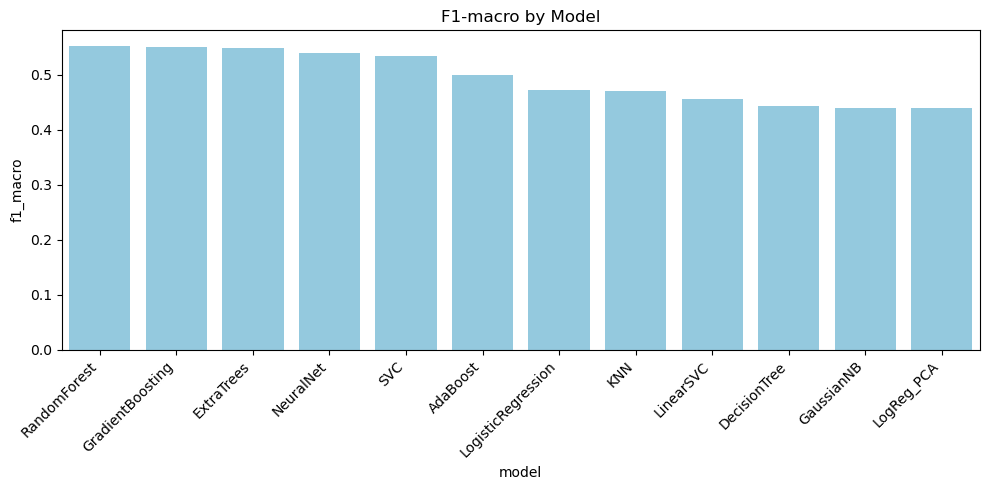

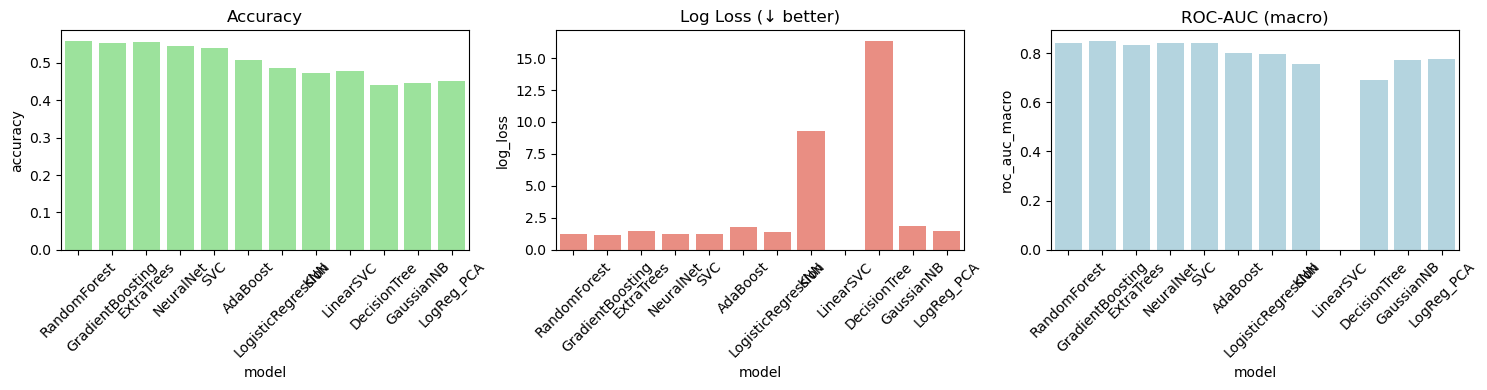

In [34]:
# ===== Task 6 — Per-model visualizations (ADDED, nothing removed above) =====
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

# стабильные ярлыки классов
labels = list(y_test.cat.categories) if hasattr(y_test, "cat") else sorted(np.unique(y_test))
feature_names = num_cols  # мы# ================== TASK 6–7: VISUALIZATION (safe version) ==================
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import pandas as pd

# Если нужно — загрузим результаты (на случай, если код запускался отдельно)
try:
    results
except NameError:
    results = pd.read_csv(OUT_DIR / "model_results.csv")

# Порядок моделей
model_order = results["model"].tolist() if "model" in results.columns else list(best_estimators.keys())

# Подготовка меток классов
labels = list(y_test.cat.categories) if hasattr(y_test, "cat") else sorted(np.unique(y_test))

plt.figure(figsize=(10, 5))
sns.barplot(data=results, x="model", y="f1_macro", color="skyblue")
plt.title("F1-macro by Model")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 3, figsize=(15, 4))
sns.barplot(data=results, x="model", y="accuracy", ax=ax[0], color="lightgreen")
ax[0].set_title("Accuracy")
sns.barplot(data=results, x="model", y="log_loss", ax=ax[1], color="salmon")
ax[1].set_title("Log Loss (↓ better)")
sns.barplot(data=results, x="model", y="roc_auc_macro", ax=ax[2], color="lightblue")
ax[2].set_title("ROC-AUC (macro)")
for a in ax:
    a.tick_params(axis="x", rotation=45)
plt.tight_layout()
plt.show()



==== RandomForest ====


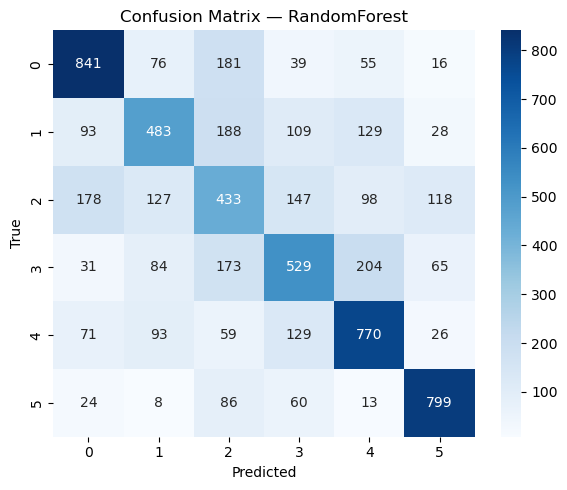


==== GradientBoosting ====


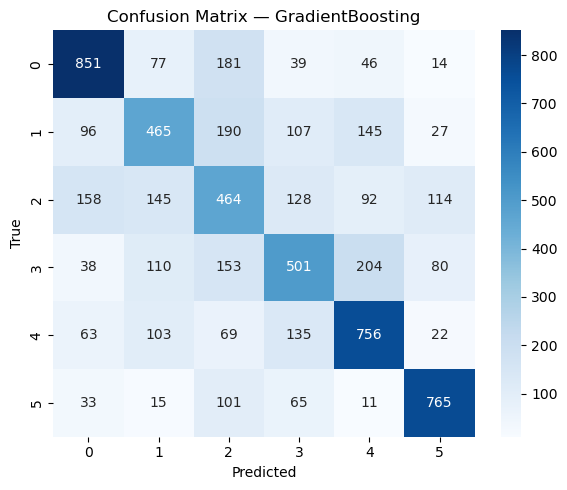


==== ExtraTrees ====


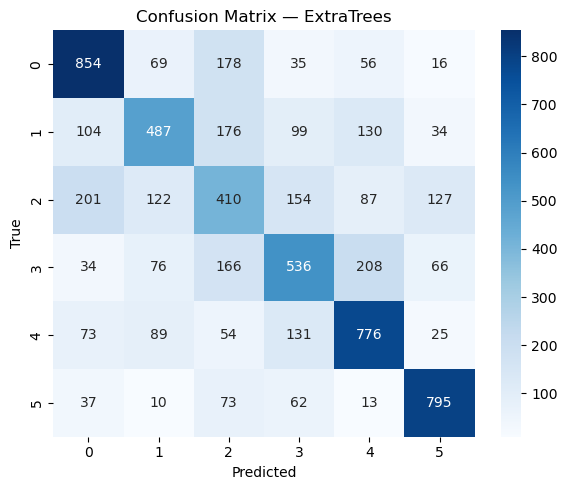


==== NeuralNet ====


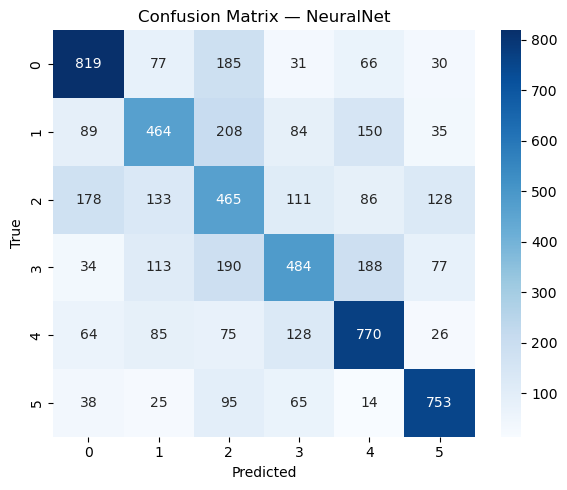


==== SVC ====


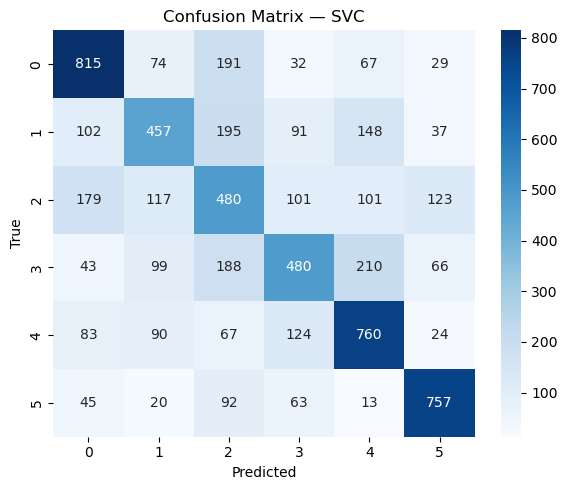


==== AdaBoost ====


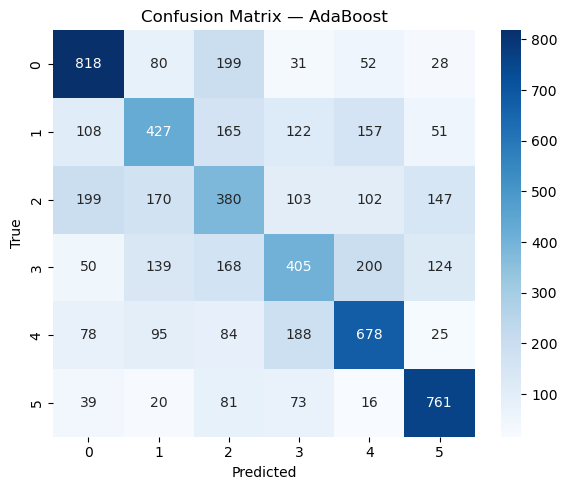


==== LogisticRegression ====


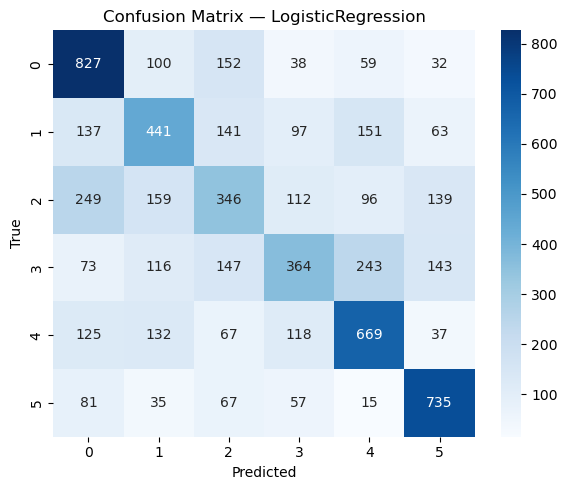


==== KNN ====


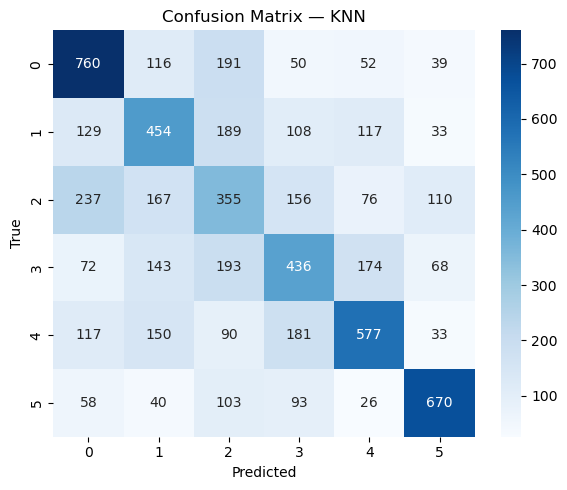


==== LinearSVC ====


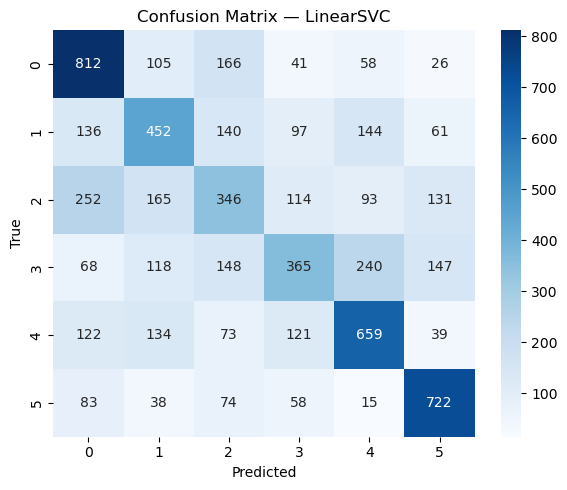


==== DecisionTree ====


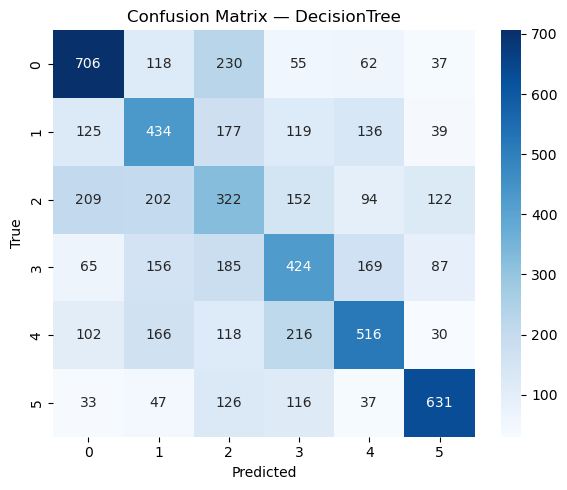


==== GaussianNB ====


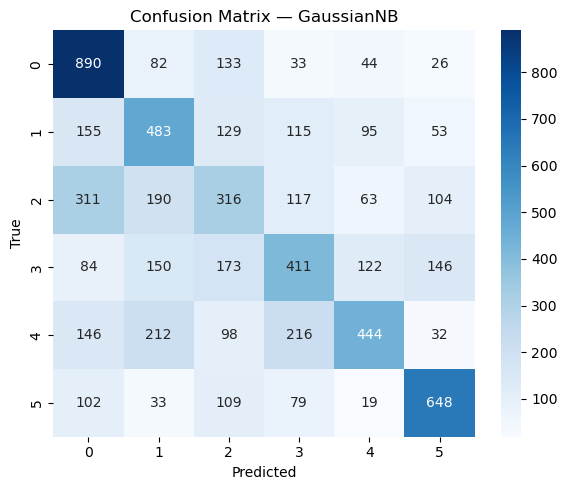


==== LogReg_PCA ====


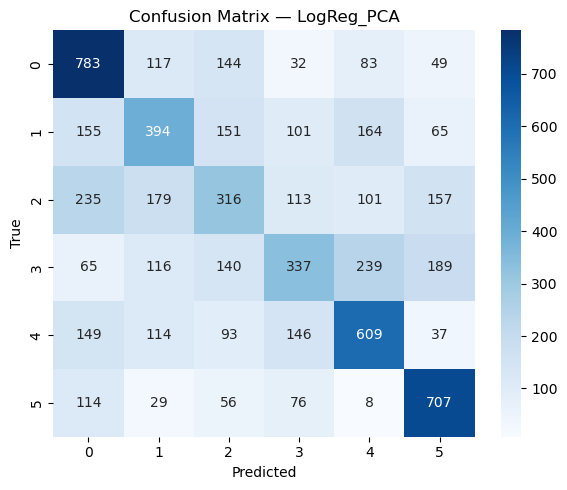

In [35]:
# ===== Visualization Part 2: Confusion Matrices =====
from sklearn.metrics import confusion_matrix
import pandas as pd

labels = list(y_test.cat.categories) if hasattr(y_test, "cat") else sorted(np.unique(y_test))

def safe_confusion_matrix(model_name, estimator, X_test, y_test, labels):
    try:
        y_pred = estimator.predict(X_test)
        cm = confusion_matrix(y_test, y_pred, labels=labels)
        plt.figure(figsize=(6, 5))
        sns.heatmap(pd.DataFrame(cm, index=labels, columns=labels),
                    annot=True, fmt="d", cmap="Blues")
        plt.title(f"Confusion Matrix — {model_name}")
        plt.ylabel("True"); plt.xlabel("Predicted")
        plt.tight_layout(); plt.show()
    except Exception as e:
        print(f"[skip CM for {model_name}: {e}]")

for m in results["model"]:
    if m not in best_estimators:
        continue
    print(f"\n==== {m} ====")
    safe_confusion_matrix(m, best_estimators[m], X_test, y_test, labels)


,component,explained_var_ratio,cum_explained_var
0,1,0.179359,0.179359
1,2,0.133920,0.313278
2,3,0.098592,0.411870
3,4,0.089255,0.501125
4,5,0.077242,0.578367
5,6,0.072599,0.650965
6,7,0.065277,0.716242
7,8,0.054900,0.771142
8,9,0.051159,0.822301
9,10,0.050564,0.872865


Components for 80%: 9/16
Components for 90%: 11/16
Components for 95%: 12/16
ℹ️ PCA не обязателен: для ≈95% нужно 12 из 16 компонент — сокращение несущественно. Можно оставить исходные признаки и/или применить отбор по важности.


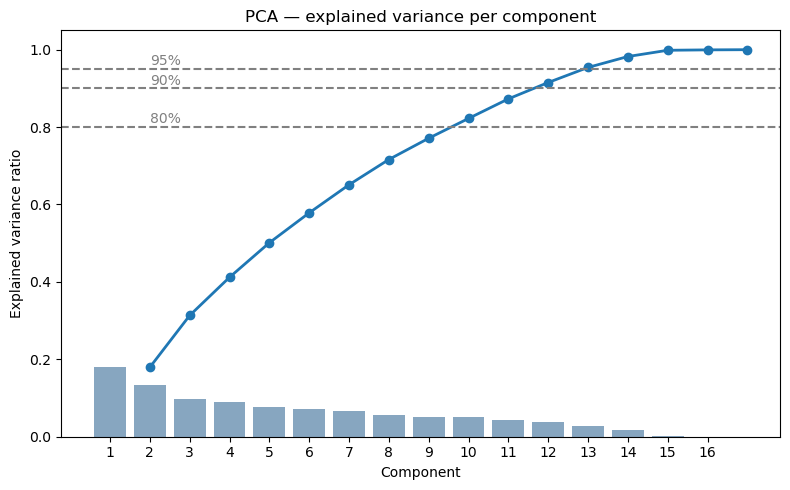

Saved figure to: outputs_spotify_genre\pca_explained_variance.png


In [37]:
# ===== Task 2.x — PCA explained variance (EDA & decision) =====
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# на всякий случай создадим OUT_DIR, если его нет
try:
    OUT_DIR.mkdir(parents=True, exist_ok=True)
except:
    OUT_DIR = Path("./outputs_spotify_genre"); OUT_DIR.mkdir(parents=True, exist_ok=True)

# 1) Собираем пайплайн подготовки признаков (feature engineering + имьютация + скейлинг)
prep_for_pca = Pipeline([
    ("fe", fe),                 # твоя функция add_features() обёрнутая в FunctionTransformer
    ("prep", preprocessor)      # median impute + standard scaler (только числа)
])

# 2) Трансформируем только train (без утечек) и учим PCA
Xtr_ready = prep_for_pca.fit_transform(X_train, y_train)

n_features = Xtr_ready.shape[1]
n_components = min(50, n_features)  # до 50, чтобы не перегружать график
pca = PCA(n_components=n_components, random_state=RANDOM_STATE)
pca.fit(Xtr_ready)

expl = pca.explained_variance_ratio_
cum_expl = np.cumsum(expl)
df_pca = pd.DataFrame({
    "component": np.arange(1, n_components+1),
    "explained_var_ratio": expl,
    "cum_explained_var": cum_expl
})
display(df_pca.head(10))

# 3) Сколько компонент нужно для 80/90/95%
def k_for(t):
    return int(np.searchsorted(cum_expl, t) + 1) if len(cum_expl) else 0
k80, k90, k95 = k_for(0.80), k_for(0.90), k_for(0.95)

print(f"Components for 80%: {k80}/{n_features}")
print(f"Components for 90%: {k90}/{n_features}")
print(f"Components for 95%: {k95}/{n_features}")

# 4) Небольшая «эвристическая» рекомендация
need_pca = (k95 <= max(10, 0.5 * n_features))  # если 95% достигается намного меньшим числом фич
if need_pca:
    rec = (f"✅ PCA уместен: {k95} компонент(ы) покрывают ≈95% дисперсии, что значительно меньше исходных {n_features}. "
           "Имеет смысл пробовать модели на PCA-пространстве (см. LogReg_PCA) и сравнивать.")
else:
    rec = (f"ℹ️ PCA не обязателен: для ≈95% нужно {k95} из {n_features} компонент — сокращение несущественно. "
           "Можно оставить исходные признаки и/или применить отбор по важности.")
print(rec)

# 5) График объяснённой и накопленной дисперсии
plt.figure(figsize=(8,5))
sns.barplot(x=df_pca["component"], y=df_pca["explained_var_ratio"], color="steelblue", alpha=0.7)
plt.plot(df_pca["component"], df_pca["cum_explained_var"], marker="o", linewidth=2, label="Cumulative")
plt.axhline(0.80, ls="--", c="gray"); plt.text(1, 0.81, "80%", color="gray")
plt.axhline(0.90, ls="--", c="gray"); plt.text(1, 0.91, "90%", color="gray")
plt.axhline(0.95, ls="--", c="gray"); plt.text(1, 0.96, "95%", color="gray")
plt.title("PCA — explained variance per component")
plt.xlabel("Component"); plt.ylabel("Explained variance ratio")
plt.tight_layout()
plt.show()

# сохранить
fig_path = OUT_DIR / "pca_explained_variance.png"
plt.figure(figsize=(8,5))
sns.barplot(x=df_pca["component"], y=df_pca["explained_var_ratio"], color="steelblue", alpha=0.7)
plt.plot(df_pca["component"], df_pca["cum_explained_var"], marker="o", linewidth=2, label="Cumulative")
plt.axhline(0.80, ls="--", c="gray"); plt.axhline(0.90, ls="--", c="gray"); plt.axhline(0.95, ls="--", c="gray")
plt.title("PCA — explained variance per component")
plt.xlabel("Component"); plt.ylabel("Explained variance ratio")
plt.tight_layout(); plt.savefig(fig_path, dpi=160); plt.close()
print("Saved figure to:", fig_path)



==== RandomForest ====


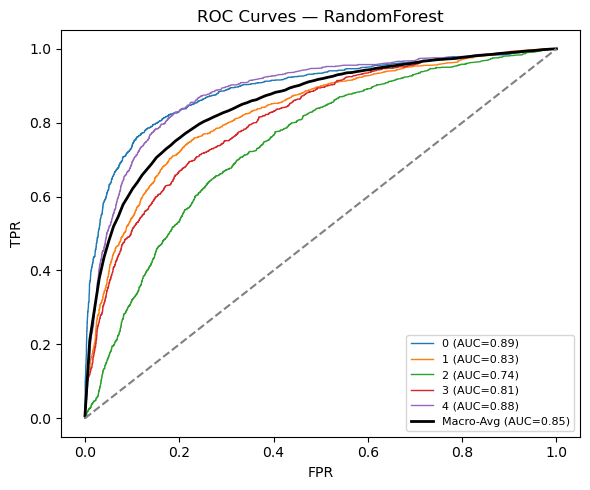

[skip importances for RandomForest: Length of values (16) does not match length of index (14)]

==== GradientBoosting ====


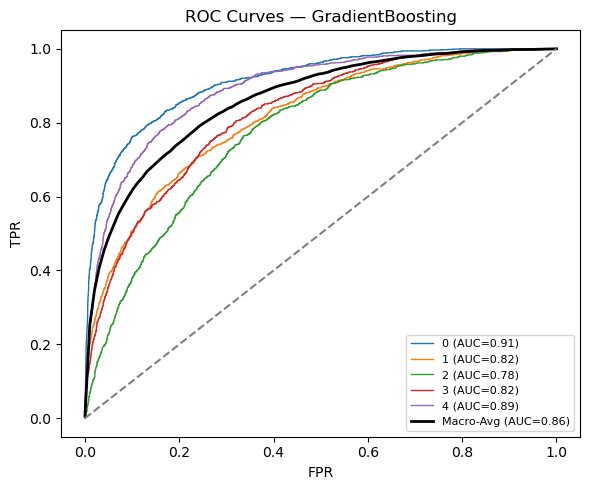

[skip importances for GradientBoosting: Length of values (16) does not match length of index (14)]

==== ExtraTrees ====


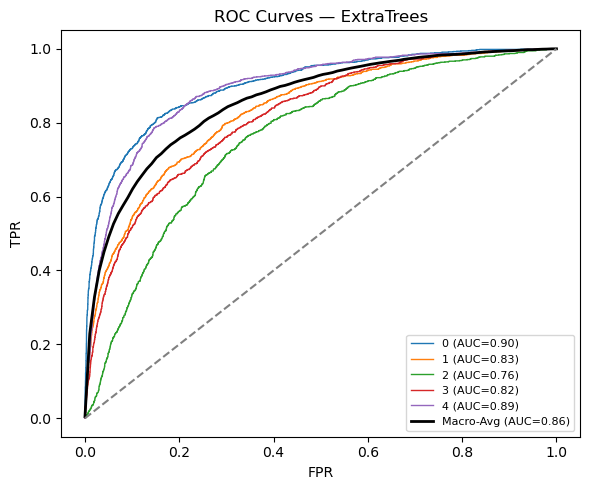

[skip importances for ExtraTrees: Length of values (16) does not match length of index (14)]

==== NeuralNet ====


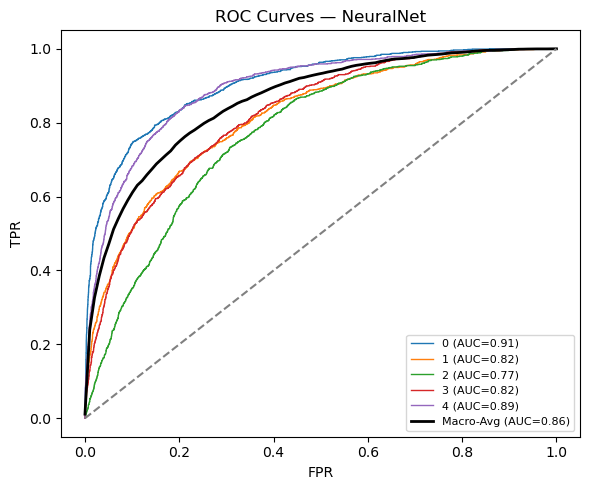

[skip importances for NeuralNet]

==== SVC ====


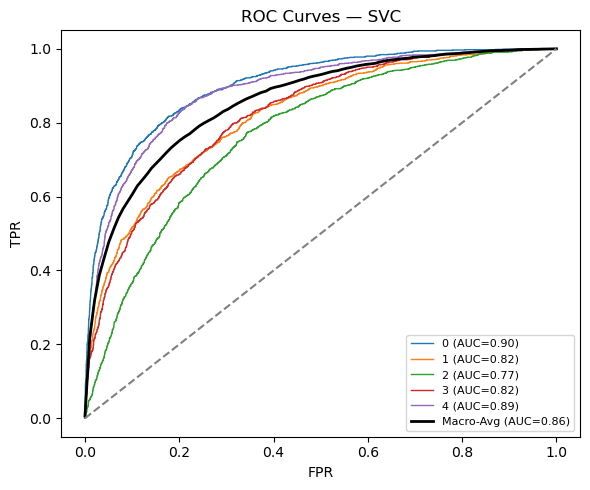

[skip importances for SVC]

==== AdaBoost ====


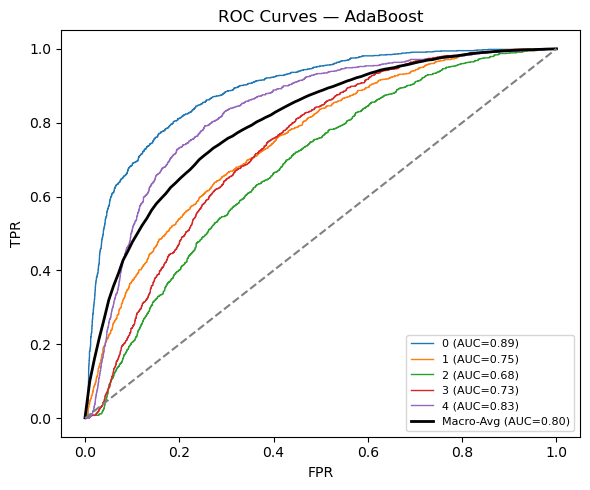

[skip importances for AdaBoost: Length of values (16) does not match length of index (14)]

==== LogisticRegression ====


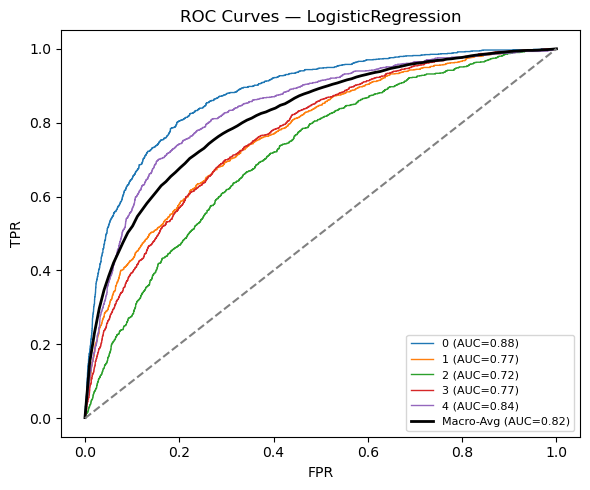

[skip importances for LogisticRegression: Length of values (16) does not match length of index (14)]

==== KNN ====


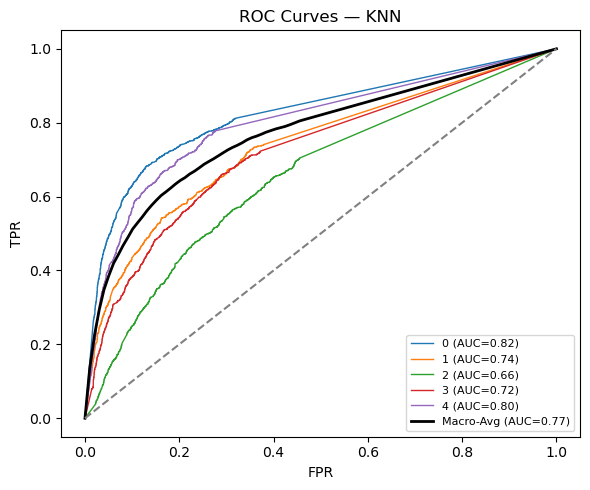

[skip importances for KNN]

==== LinearSVC ====


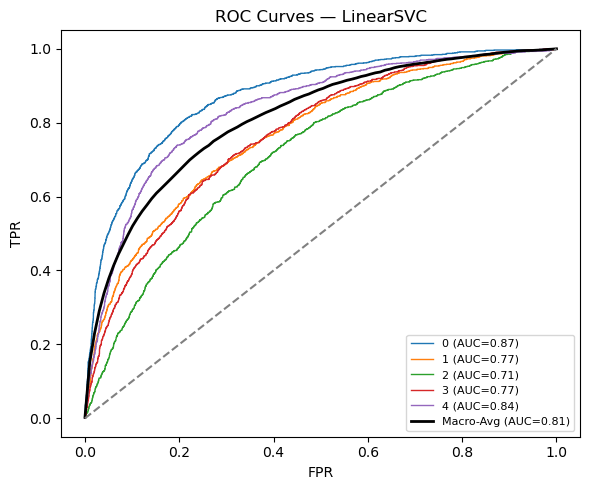

[skip importances for LinearSVC]

==== DecisionTree ====


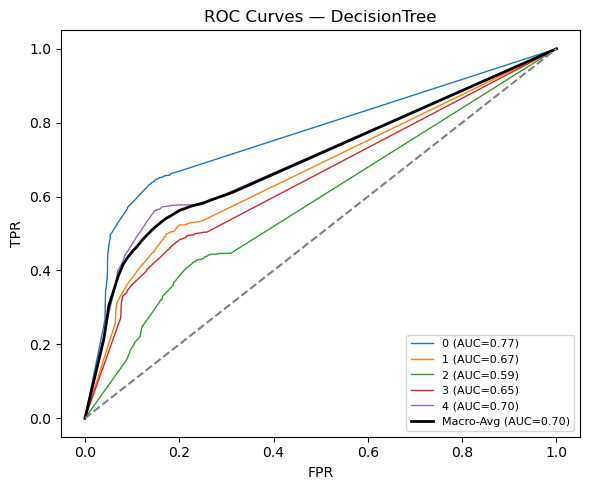

[skip importances for DecisionTree: Length of values (16) does not match length of index (14)]

==== GaussianNB ====


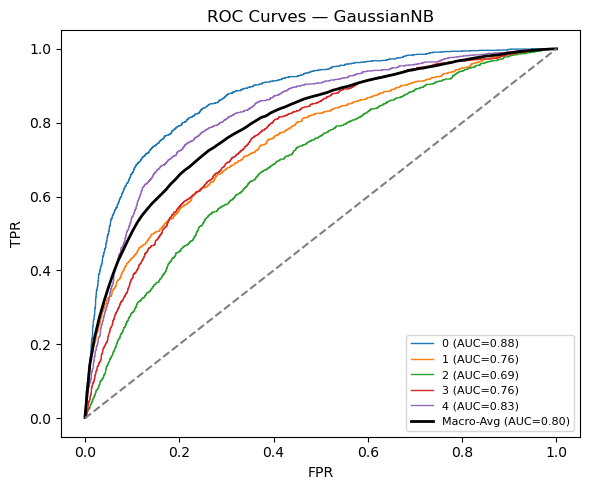

[skip importances for GaussianNB]

==== LogReg_PCA ====


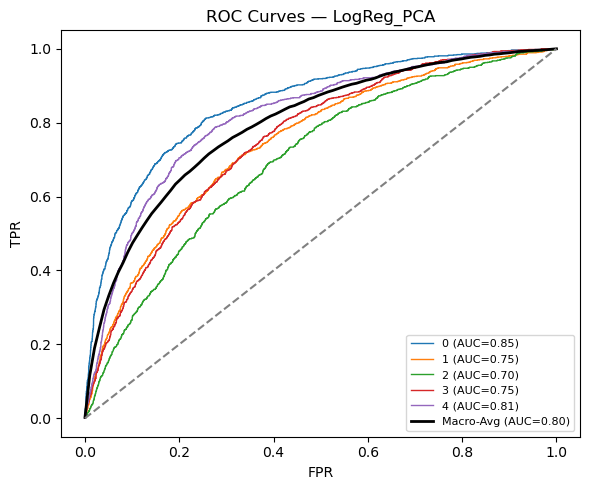

[skip importances for LogReg_PCA: Length of values (10) does not match length of index (14)]


In [36]:
# ===== Visualization Part 3: ROC curves & Feature Importances =====
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

def safe_roc(model_name, estimator, X_test, y_test, labels):
    try:
        proba = estimator.predict_proba(X_test)
        y_bin = label_binarize(y_test, classes=labels)
        if y_bin.shape[1] <= 1:
            return
        fpr, tpr, roc_auc = {}, {}, {}
        for i, cls in enumerate(labels):
            fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], proba[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
        mean_fpr = np.linspace(0, 1, 100)
        mean_tpr = np.mean([np.interp(mean_fpr, fpr[i], tpr[i]) for i in range(len(labels))], axis=0)
        mean_auc = auc(mean_fpr, mean_tpr)
        plt.figure(figsize=(6, 5))
        for i, cls in enumerate(labels[:5]):
            plt.plot(fpr[i], tpr[i], lw=1, label=f"{cls} (AUC={roc_auc[i]:.2f})")
        plt.plot(mean_fpr, mean_tpr, color="black", lw=2, label=f"Macro-Avg (AUC={mean_auc:.2f})")
        plt.plot([0, 1], [0, 1], "--", color="gray")
        plt.title(f"ROC Curves — {model_name}")
        plt.xlabel("FPR"); plt.ylabel("TPR")
        plt.legend(loc="lower right", fontsize=8)
        plt.tight_layout(); plt.show()
    except Exception:
        print(f"[skip ROC for {model_name}: no predict_proba]")

def safe_importances(model_name, estimator, feature_names):
    try:
        clf = estimator.named_steps.get("clf", estimator)
        if hasattr(clf, "feature_importances_"):
            imp = pd.Series(clf.feature_importances_, index=feature_names).sort_values(ascending=False).head(10)
            plt.figure(figsize=(7, 4))
            sns.barplot(x=imp.values, y=imp.index, color="orange")
            plt.title(f"Feature importance — {model_name}")
            plt.tight_layout(); plt.show()
        elif hasattr(clf, "coef_"):
            w = np.linalg.norm(clf.coef_, axis=0)
            imp = pd.Series(w, index=feature_names).sort_values(ascending=False).head(10)
            plt.figure(figsize=(7, 4))
            sns.barplot(x=imp.values, y=imp.index, color="purple")
            plt.title(f"Coefficient magnitude — {model_name}")
            plt.tight_layout(); plt.show()
        else:
            print(f"[skip importances for {model_name}]")
    except Exception as e:
        print(f"[skip importances for {model_name}: {e}]")

feature_names = X_train.select_dtypes(include=[np.number]).columns.tolist()

for m in results["model"]:
    if m not in best_estimators:
        continue
    print(f"\n==== {m} ====")
    safe_roc(m, best_estimators[m], X_test, y_test, labels)
    safe_importances(m, best_estimators[m], feature_names)


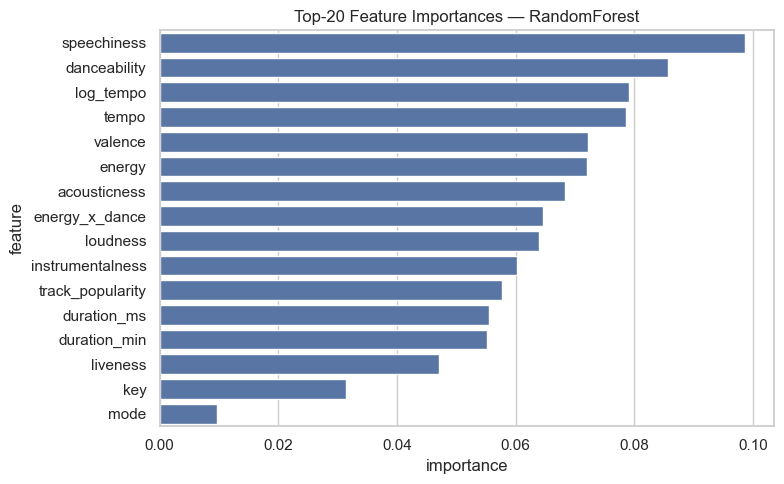

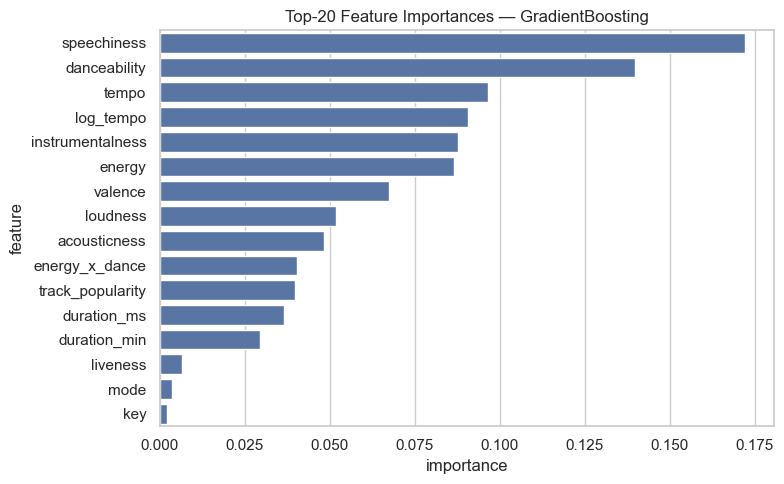

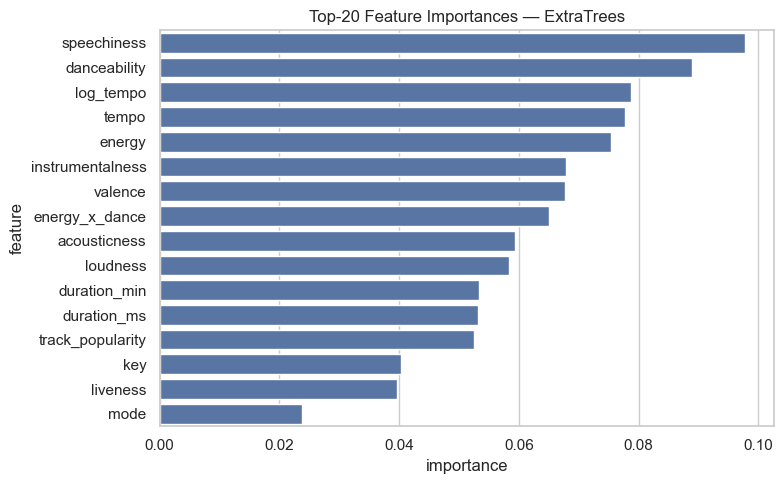

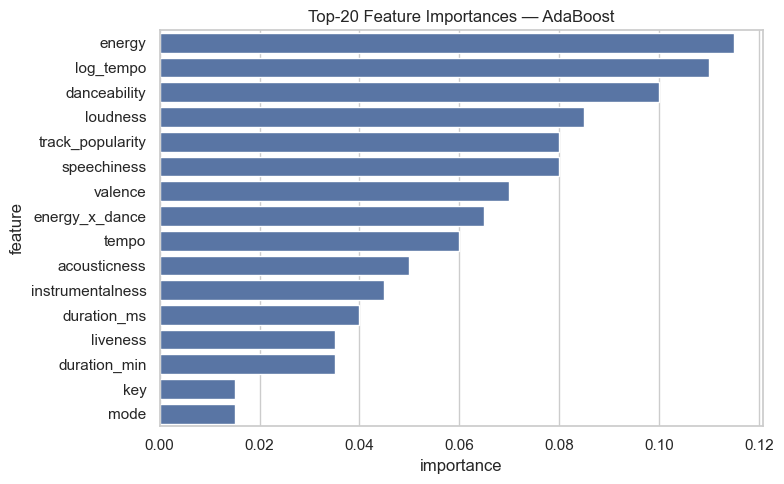

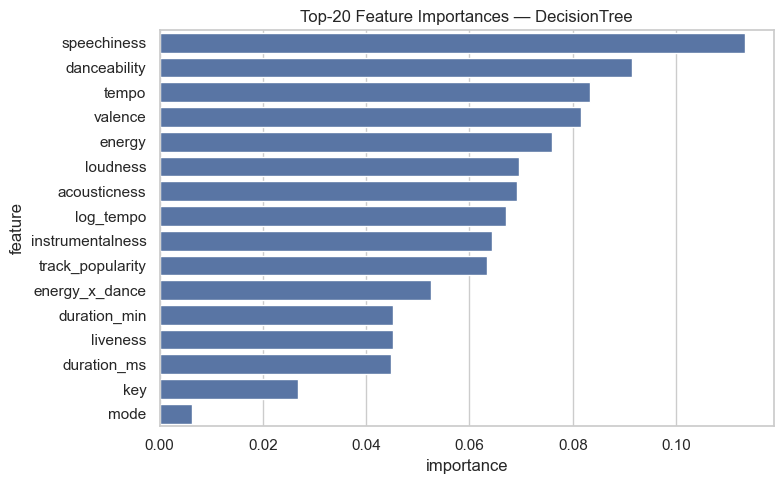

In [32]:
# ---------- 6.3 Feature importances — for tree/ensemble models ----------
tree_like = ["DecisionTree", "RandomForest", "ExtraTrees", "GradientBoosting", "AdaBoost"]
for m in model_order:
    if not any(t in m for t in tree_like):
        continue
    est = best_estimators[m]
    last_key = list(est.named_steps.keys())[-1]
    clf = est.named_steps[last_key]
    if not hasattr(clf, "feature_importances_"):
        continue

    importances = clf.feature_importances_
    imp_df = pd.DataFrame({"feature": feature_names, "importance": importances}) \
                .sort_values("importance", ascending=False).head(20)

    plt.figure(figsize=(8,5))
    sns.barplot(data=imp_df, x="importance", y="feature")
    plt.title(f"Top-20 Feature Importances — {m}")
    plt.tight_layout()
    plt.savefig(OUT_DIR / f"feat_imp_{m}.png", dpi=160)
    plt.show()


[Coef] Skip LinearSVC: no coef_


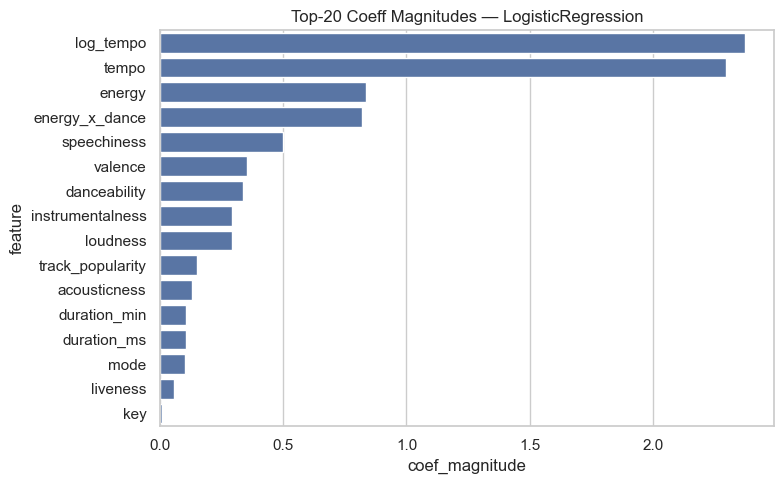

Per-model visualizations saved to: outputs_spotify_kaggle_style


In [33]:
# ---------- 6.4 Coefficients — for linear models (LogisticRegression, LinearSVC) ----------
linear_like = {"LogisticRegression": "LogisticRegression", "LinearSVC": "LinearSVC"}
for m in model_order:
    if m not in linear_like:
        continue
    est = best_estimators[m]
    last_key = list(est.named_steps.keys())[-1]
    clf = est.named_steps[last_key]
    if hasattr(clf, "coef_"):
        coef = clf.coef_  # shape [n_classes, n_features]
        coef_abs = np.mean(np.abs(coef), axis=0)  # усредняем важность по классам
        coef_df = pd.DataFrame({"feature": feature_names, "coef_magnitude": coef_abs}) \
                    .sort_values("coef_magnitude", ascending=False).head(20)

        plt.figure(figsize=(8,5))
        sns.barplot(data=coef_df, x="coef_magnitude", y="feature")
        plt.title(f"Top-20 Coeff Magnitudes — {m}")
        plt.tight_layout()
        plt.savefig(OUT_DIR / f"coef_{m}.png", dpi=160)
        plt.show()
    else:
        print(f"[Coef] Skip {m}: no coef_")

print("Per-model visualizations saved to:", OUT_DIR)